In [79]:
import pandas as pd
import numpy as npd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

In [80]:
#Load data
df = pd.read_csv('gas_turbines.csv')
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


<AxesSubplot:title={'center':'Distplot for TEY'}, xlabel='TEY', ylabel='Density'>

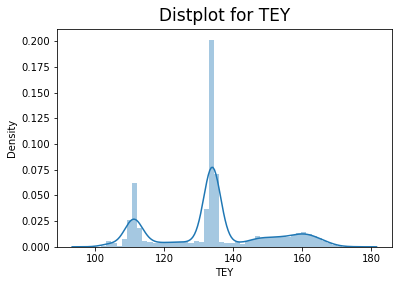

In [82]:
plt.title('Distplot for TEY', fontsize=17, y = 1.01)
sns.distplot(df['TEY'])

In [84]:
x = df.drop('TEY', axis=1)
y = df['TEY']

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((11279, 10), (3760, 10), (11279,), (3760,))

In [86]:
# Importing the necessary packages
import tensorflow as tf
import keras
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout

In [92]:
def create_model_three_hidden_layers():
    model = Sequential()
    model.add(Dense(32, input_dim=10, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(32, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1))
    
    adam=Adam(learning_rate=0.01)
    model.compile(loss='mse', optimizer=adam, metrics=['mse', 'mae', 'mape'])
    return model

In [93]:
model = KerasRegressor(build_fn = create_model_three_hidden_layers,verbose = 0)
# Define the grid search parameters
batch_size = [30,50,70]
epochs = [300,500,800]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=30, epochs=300...................................
[CV 1/5; 1/9] END ...batch_size=30, epochs=300;, score=-1.198 total time= 2.6min
[CV 2/5; 1/9] START batch_size=30, epochs=300...................................
[CV 2/5; 1/9] END ...batch_size=30, epochs=300;, score=-0.994 total time= 2.6min
[CV 3/5; 1/9] START batch_size=30, epochs=300...................................
[CV 3/5; 1/9] END ...batch_size=30, epochs=300;, score=-1.175 total time= 2.7min
[CV 4/5; 1/9] START batch_size=30, epochs=300...................................
[CV 4/5; 1/9] END ...batch_size=30, epochs=300;, score=-1.373 total time= 3.0min
[CV 5/5; 1/9] START batch_size=30, epochs=300...................................
[CV 5/5; 1/9] END ...batch_size=30, epochs=300;, score=-2.248 total time= 2.6min
[CV 1/5; 2/9] START batch_size=30, epochs=500...................................
[CV 1/5; 2/9] END ...batch_size=30, epochs=500;, 

In [94]:
grid_result

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x00000225A3E16BB0>,
             param_grid={'batch_size': [30, 50, 70], 'epochs': [300, 500, 800]},
             verbose=10)

In [95]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -1.3803606867790221, using {'batch_size': 70, 'epochs': 800}
-1.3977492690086364,0.4415961237488772 with: {'batch_size': 30, 'epochs': 300}
-2.3859138011932375,1.1569173933922428 with: {'batch_size': 30, 'epochs': 500}
-1.590137243270874,0.655052007684217 with: {'batch_size': 30, 'epochs': 800}
-2.1511343479156495,0.969508593823688 with: {'batch_size': 50, 'epochs': 300}
-1.9769815444946288,0.9617795047032871 with: {'batch_size': 50, 'epochs': 500}
-1.7288410186767578,0.8102226046004801 with: {'batch_size': 50, 'epochs': 800}
-2.053271198272705,0.6935078095039184 with: {'batch_size': 70, 'epochs': 300}
-2.5456727027893065,1.5346087993920394 with: {'batch_size': 70, 'epochs': 500}
-1.3803606867790221,0.613445299881951 with: {'batch_size': 70, 'epochs': 800}
